# **TP03 - Regresión Logística**

<p align="center">
  <image src="https://github.com/walteraguirre/TPS/blob/main/TP03/imagenes/enunciado.png?raw=true" alt="Descripción de la imagen">
</p>

## **Análisis**

<p align="center">
  <image src="https://github.com/walteraguirre/TPS/blob/main/TP03/imagenes/ej1_.png?raw=true" alt="Descripción de la imagen">
</p>

### **Regresión Logística**

La **regresión logística** es un modelo de clasificación utilizado principalmente para problemas donde la variable de salida es binaria. Se basa en la regresión lineal, pero en lugar de predecir valores continuos, aplica la función sigmoide para convertir la salida en una probabilidad comprendida entre 0 y 1.  

El modelo se define como:  

$$
P(y=1 | x) = \sigma (w^T x + b) =\frac{1}{1 + e^{-(w^T x + b)}} = p
$$

donde:  

- $ P(y=1 | x) $ representa la probabilidad de que la clase sea 1 dado un vector de entrada $ x $.  
- $ w $ es el vector de pesos del modelo.  
- $ b $ es el sesgo (bias).  
- La función sigmoide $ \sigma(z) = \frac{1}{1 + e^{-z}} $ transforma la salida de la combinación lineal en un valor entre 0 y 1.  

---

### **Cálculo de la inversa $\sigma^{-1}(p)$ con $p \in (0,1)$**

Sabemos que:

$$
\sigma(z) = \frac{1}{1 + e^{-z}} = p
$$


Lo que queremos ahora, es encontrar una expresión para $z$ en función de p, es decir, $z = \sigma^{-1}(p)$.

Partimos de que:

$$
p = \frac{1}{1 + e^{-z}}
$$

Multiplicamos ambos miembros por $1 + e^{-z}$ y reordenamos la expresión:

$$
p \ (1+e^{-z}) = 1
$$

$$
p + p \ e^{-z} = 1
$$

$$
e^{-z} = \frac{1-p}{p}
$$


Aplicando logaritmo a ambos miembros:

$$
-z = ln\left( \frac{1-p}{p}  \right)
$$


Por último multiplicamos por $-1$ y obtenemos la expresión final:

$$
z = \sigma^{-1}(p) = -ln\left( \frac{1-p}{p}  \right)
$$

A $z$ se lo conoce como logit.

---

### **Cálculo de la derivada de $\sigma(z)$**

Nos piden calcular la derivada de la función sigmoide:

$$
\sigma'(z) = \frac{\text{d}}{\text{d} z} \left( \frac{1}{1 + e^{-z}} \right)
$$

Aplicando reglas de derivación, especificamente la regla del cociente, obtenemos lo siguiente:

$$
\sigma'(z) = \frac{0 \ \left(1+e^{-z} \right) + 1 \ \left( -e^{-z} \right) }{\left( 1 + e^{-z}  \right)^2}
$$

$$
\sigma'(z) = \frac{e^{-z}}{\left( 1 + e^{-z}  \right)^2}
$$


Ahora queremos expresar el resultado en función de $p$. Para ello partimos de que:

$$
p = \frac{1}{1+e^{-z}}
$$

$$
\Rightarrow \frac{1}{p} = 1 + e^{-z}
$$

Por lo tanto, reemplazando que $1+e^{-z} = \frac{1}{p}$ y que $e^{-z} = \frac{1}{p} - 1$, podemos obtener la siguiente expresión:

$$
\sigma'(z) = \frac{ \frac{1}{p} - 1 }{\left( \frac{1}{p} \right)^2}
$$

$$
\sigma'(z) = p \ (1-p)
$$


Por lo tanto la derivada de la función sigmoide en función de $p$ es la siguiente:

$$
\sigma'(z) = p \ (1-p)
$$

Este resultado es muy útil porque evita depender directamente de $z$ y solo usa $p$ que es la salida de la sigmoide.

---

### **Expresión analítica para la función costo y su gradiente**

Dado que estamos analizando un problema de clasificación binaria, la función costo que se utiliza es la función de costo de entropía cruzada que tiene la siguiente expresión:


### **1. Función de Costo**
La función de costo de la regresión logística es:

$$
J(w, b) = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \log \sigma(w^T X_i + b) + (1 - Y_i) \log (1 - \sigma(w^T X_i + b)) \right]
$$

donde:  
- $ n $ es el número de muestras.  
- $ Y_i $ es la etiqueta real de la muestra $ i $ ($ 0 $ o $ 1 $).  
- $ X_i $ es el vector de características de la muestra $ i $.  
- $ w $ es el vector de pesos.  
- $ b $ es el sesgo.  
- $ \sigma(z) = \frac{1}{1 + e^{-z}} $ es la función sigmoide.  

Esta función mide la diferencia entre la probabilidad predicha por el modelo y la etiqueta real.

---

### **2. Gradiente de la Función de Costo**
Para obtener el gradiente de la función costo, necesitamos calcular las derivadas parciales de $ J(w, b) $ respecto a $ w $ y $ b $.

Antes de obtener el gradiente, definimos algunas expresiones que nos serán útiles:

#### **a. Derivada de $\sigma$ con respecto a $w$**  

Aplicamos regla de la cadena:

$$
\frac{\partial}{\partial w} \sigma(w^T X_i + b) = X_i \sigma'(w^T X_i + b)
$$

#### **b. Derivada de $\sigma$ con respecto a $b$**

$$
\frac{\partial}{\partial b} \sigma(w^T X_i + b) = \sigma'(w^T X_i + b)
$$


Además, de los resultados previos, podemos decir que:

$$
\text{Si } \ \sigma(w^T X_i + b) = p_i \ \ \rightarrow \ \  \sigma'(w^T X_i + b) = p_i \ (1 - p_i)
$$

Por lo tanto, las derivadas parciales serán:

$$
\frac{\partial}{\partial w} \sigma(w^T X_i + b) = X_i \ p_i \ (1 - p_i)
$$

$$
\frac{\partial}{\partial b} \sigma(w^T X_i + b) = p_i \ (1 - p_i)
$$


Ahora si procedemos al calculo del gradiente de la función costo:

### **Derivada con respecto a $w$**


Derivamos la función de costo respecto a  $w$:

$$
\frac{\partial J}{\partial w} = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \frac{1}{\sigma(w^T X_i + b)} \frac{\partial}{\partial w} \ \sigma(w^T X_i + b) - (1 - Y_i) \frac{1}{1 - \sigma(w^T X_i + b)} \frac{\partial}{\partial w} \ \sigma(w^T X_i + b) \right]
$$


Reemplazando los resultados previos para obtener una expresión simplificada en función de $p_i$:

$$
\frac{\partial J}{\partial w} = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \ \frac{1}{p_i} \  p_i \  (1 - p_i) \ X_i - (1 - Y_i) \  \frac{1}{1 - p_i} \ p_i \ (1 - p_i) X_i \right]
$$

$$
\frac{\partial J}{\partial w} = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \ (1 - p_i) \ X_i - (1 - Y_i) \  p_i \ X_i \right]
$$

Sacando factor común $X_i$:

$$
\frac{\partial J}{\partial w} = -\frac{1}{n} \sum_{i=1}^{n} X_i \ \left[ Y_i - Y_i \ p_i - \left( p_i - Y_i \ p_i \right) \right]
$$

Por lo que la expresión final queda como:

$$
\frac{\partial J}{\partial w} = -\frac{1}{n} \sum_{i=1}^{n} X_i ( Y_i - p_i )
$$

---

### **Derivada con respecto a $ b $**


La deducción es similar:

$$
\frac{\partial J}{\partial b} = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \frac{1}{\sigma(w^T X_i + b)} \frac{\partial}{\partial b} \ \sigma(w^T X_i + b) - (1 - Y_i) \frac{1}{1 - \sigma(w^T X_i + b)} \frac{\partial}{\partial b} \ \sigma(w^T X_i + b) \right]
$$

Reescribiendo para que la expresión nos quede en función de $p_i$:

$$
\frac{\partial J}{\partial b} = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \frac{1}{p_i} \ p_i \ (1 - p_i) - (1 - Y_i) \frac{1}{1 - p_i} \ p_i \ (1 - p_i) \right]
$$

$$
\frac{\partial J}{\partial b} = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \ (1 - p_i) - (1 - Y_i) \ p_i \right]
$$

$$
\frac{\partial J}{\partial b} = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i - Y_i \ p_i - (p_i - Y_i \ p_i) \right]
$$

Por lo que la expresión queda de la siguiente manera:

$$
\frac{\partial J}{\partial b} = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i - p_i \right]
$$

---

### **3. Resumen**

1. **Función costo:**  

   $$
   J(w, b) = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \log \sigma(w^T X_i + b) + (1 - Y_i) \log (1 - \sigma(w^T X_i + b)) \right]
   $$

2. **Gradientes:**  

   $$
   \frac{\partial J}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} ( \sigma(w^T X_i + b) - Y_i ) X_i
   $$

   $$
   \frac{\partial J}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (\sigma(w^T X_i + b) - Y_i)
   $$



## **Pre procesamiento**

In [12]:
import kagglehub
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, roc_curve, auc

In [13]:
#cambio el directorio de descarga
os.environ["KAGGLEHUB_CACHE"] = os.getcwd()

#descargo el dataset
kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")


# Directorios de las imágenes
folders = [
    r"datasets\bhavikjikadara\dog-and-cat-classification-dataset\versions\1\PetImages\Dog",
    r"datasets\bhavikjikadara\dog-and-cat-classification-dataset\versions\1\PetImages\Cat"
]

# Lista para almacenar las imágenes
images = []

# Tamaño deseado
target_size = (16, 16)

# Etiquetas: 0 para gatos, 1 para perros
for folder_path in folders:
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        try:
            # Abrir la imagen, convertir a escala de grises y redimensionar
            img = Image.open(file_path).convert('L')
            img = img.resize(target_size)
            
            # Guardar la imagen como matriz y la etiqueta correspondiente
            images.append(np.array(img))

        except Exception as e:
            print(f"Error al procesar {filename}: {e}")


# Seleccionar 5 imágenes aleatorias de la lista
random_images = random.sample(images, 5)

# Crear una figura para mostrar las imágenes
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Mostrar cada imagen
for i, ax in enumerate(axes):
    ax.imshow(random_images[i], cmap='gray')  # Mostrar la imagen en escala de grises
    ax.axis('off')  # No mostrar los ejes

plt.show()



KeyboardInterrupt: 

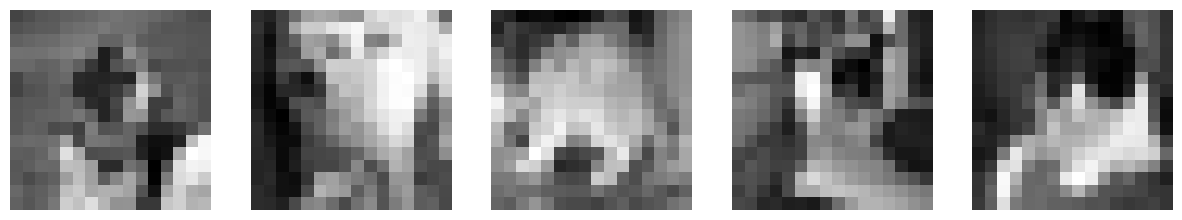

In [ ]:
#armado de los conjuntos de entrenamiento, validacion y testeo

# Crear las etiquetas correspondientes (0 para gatos, 1 para perros)
labels = [0] * len(os.listdir(folders[0])) + [1] * len(os.listdir(folders[1]))

# Asegurarse de que las imágenes
assert len(images) == len(labels)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(images, labels, train_size=20000, random_state=42)

# Seleccionar 5 imágenes aleatorias de la lista
random_images = random.sample(X_train, 5)

# Crear una figura para mostrar las imágenes
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Mostrar cada imagen
for i, ax in enumerate(axes):
    ax.imshow(random_images[i], cmap='gray')  # Mostrar la imagen en escala de grises
    ax.axis('off')  # No mostrar los ejes

plt.show()


## **Clasificación**


In [ ]:
# Aplanar las imágenes (convertir 2D a 1D)
X_train_flat = np.array([img.flatten() for img in X_train])
X_test_flat = np.array([img.flatten() for img in X_test])

# Escalar los datos (normalización 0-1)
X_train_scaled = X_train_flat / 255.0
X_test_scaled = X_test_flat / 255.0

# Crear el modelo de regresión logística sin regularización
model = LogisticRegression(C=1e10, solver='lbfgs', max_iter=3000)

# Entrenar el modelo con los datos escalados
model.fit(X_train_scaled, y_train)

# Predecir las etiquetas de las muestras de entrenamiento
y_train_pred = model.predict(X_train_scaled)

# Predecir las etiquetas de las muestras de prueba
y_test_pred = model.predict(X_test_scaled)

# Calcular la precisión para entrenamiento y testeo
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Mostrar los resultados
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")


Precisión en el conjunto de entrenamiento: 0.5874
Precisión en el conjunto de prueba: 0.5586


## **Cross-Entropy**



In [ ]:
# Función para calcular la cross-entropy
def cross_entropy(y_true, log_proba):
    """
    Calcula la cross-entropy dada la salida de predict_log_proba.
    
    Parámetros:
    y_true: etiquetas verdaderas (0 o 1)
    log_proba: logaritmo de las probabilidades predichas para cada clase
    
    Retorna:
    Valor de cross-entropy promedio
    """
    # Extraer las probabilidades logarítmicas correspondientes a las clases correctas
    log_q = log_proba[np.arange(len(y_true)), y_true]
    
    # Calcular la cross-entropy
    return -np.mean(log_q)

# Asegurar que los datos estén escalados entre 0 y 1
X_train_scaled = np.array(X_train_flat) / 255.0
X_test_scaled = np.array(X_test_flat) / 255.0

# Crear el modelo de regresión logística sin regularización
model = LogisticRegression(C=1e10, solver='lbfgs', max_iter=5000)

# Entrenar el modelo con los datos escalados
model.fit(X_train_scaled, y_train)

# Predecir las probabilidades logarítmicas
log_proba_train = model.predict_log_proba(X_train_scaled)
log_proba_test = model.predict_log_proba(X_test_scaled)

# Calcular la cross-entropy para entrenamiento y testeo
train_cross_entropy = cross_entropy(y_train, log_proba_train)
test_cross_entropy = cross_entropy(y_test, log_proba_test)


# Mostrar los resultados
print(f"Cross-entropy en el conjunto de entrenamiento: {train_cross_entropy:.4f}")
print(f"Cross-entropy en el conjunto de prueba: {test_cross_entropy:.4f}")

Cross-entropy en el conjunto de entrenamiento: 0.6714
Cross-entropy en el conjunto de prueba: 0.6879


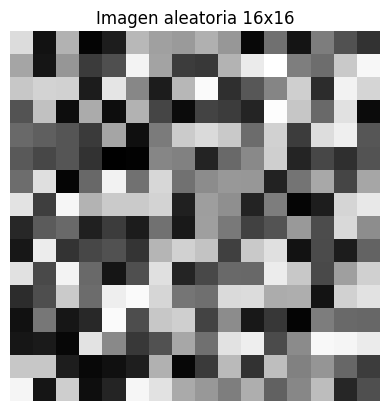

Clase predicha: 1


In [ ]:
# Crear una imagen aleatoria de 16x16 (valores entre 0 y 255)
random_image = np.random.randint(0, 256, (16, 16))

# Mostrar la imagen sin ejes
plt.imshow(random_image, cmap='gray')
plt.title("Imagen aleatoria 16x16")
plt.axis('off')  # Desactivar los ejes
plt.show()

#escalo la imagen
rnd_image_scaled = random_image.flatten() / 255.0

# Clasificar la imagen utilizando el modelo entrenado
predicted_class = model.predict([rnd_image_scaled])

print(f"Clase predicha: {predicted_class[0]}")

## **Regularización**

Precisión sin regularización - Entrenamiento: 0.9980
Precisión sin regularización - Testeo: 0.6257
Precisión con regularización - Entrenamiento: 0.8886
Precisión con regularización - Testeo: 0.6547


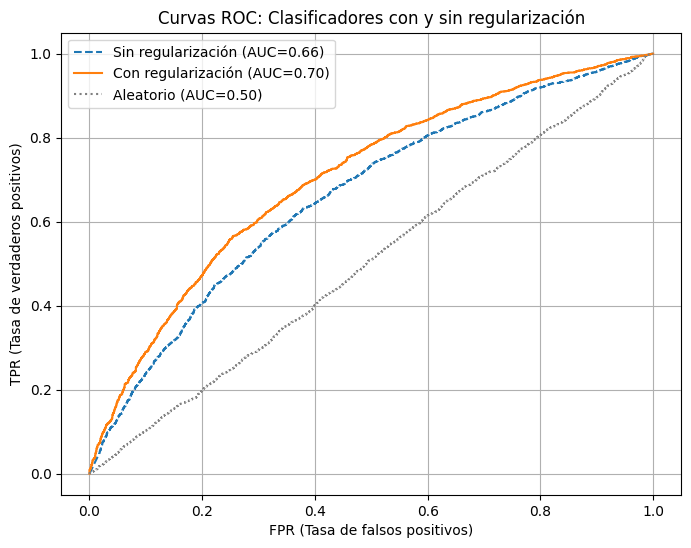

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc

# Crear el mapa polinómico de orden 2
poly = PolynomialFeatures(degree=2)

# Transformar los datos originales a su versión polinómica
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Entrenar la regresión logística SIN regularización (C grande)
#model_no_reg = LogisticRegression(C=1e10, solver='lbfgs', max_iter=2000)
model_no_reg = LogisticRegression(C=1e10, solver='lbfgs', max_iter=5000)
model_no_reg.fit(X_train_poly, y_train)

# Entrenar la regresión logística CON regularización (C pequeño)
model_reg = LogisticRegression(C=1, solver='lbfgs', max_iter=5000)
model_reg.fit(X_train_poly, y_train)

# Predicciones de cada modelo
y_train_pred_no_reg = model_no_reg.predict(X_train_poly)
y_test_pred_no_reg = model_no_reg.predict(X_test_poly)

y_train_pred_reg = model_reg.predict(X_train_poly)
y_test_pred_reg = model_reg.predict(X_test_poly)

# Calcular precisión en entrenamiento y testeo
train_acc_no_reg = accuracy_score(y_train, y_train_pred_no_reg)
test_acc_no_reg = accuracy_score(y_test, y_test_pred_no_reg)

train_acc_reg = accuracy_score(y_train, y_train_pred_reg)
test_acc_reg = accuracy_score(y_test, y_test_pred_reg)

print(f"Precisión sin regularización - Entrenamiento: {train_acc_no_reg:.4f}")
print(f"Precisión sin regularización - Testeo: {test_acc_no_reg:.4f}")

print(f"Precisión con regularización - Entrenamiento: {train_acc_reg:.4f}")
print(f"Precisión con regularización - Testeo: {test_acc_reg:.4f}")

# Obtener probabilidades de la clase positiva para la curva ROC
y_scores_no_reg = model_no_reg.predict_proba(X_test_poly)[:, 1]
y_scores_reg = model_reg.predict_proba(X_test_poly)[:, 1]

# Calcular la curva ROC
fpr_no_reg, tpr_no_reg, _ = roc_curve(y_test, y_scores_no_reg)
fpr_reg, tpr_reg, _ = roc_curve(y_test, y_scores_reg)
random_fpr, random_tpr, _ = roc_curve(y_test, np.random.rand(len(y_test)))

# Calcular el área bajo la curva (AUC)
auc_no_reg = auc(fpr_no_reg, tpr_no_reg)
auc_reg = auc(fpr_reg, tpr_reg)
auc_random = auc(random_fpr, random_tpr)

# Graficar las curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_no_reg, tpr_no_reg, label=f"Sin regularización (AUC={auc_no_reg:.2f})", linestyle='--')
plt.plot(fpr_reg, tpr_reg, label=f"Con regularización (AUC={auc_reg:.2f})", linestyle='-')
plt.plot(random_fpr, random_tpr, label=f"Aleatorio (AUC={auc_random:.2f})", linestyle='dotted', color='gray')

plt.xlabel("FPR (Tasa de falsos positivos)")
plt.ylabel("TPR (Tasa de verdaderos positivos)")
plt.title("Curvas ROC: Clasificadores con y sin regularización")
plt.legend()
plt.grid()
plt.show()
